In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

import matplotlib.pyplot as plt
import pandas as pd
from rdkit import RDLogger
from pandarallel import pandarallel

import massspecgym.utils as utils

In [3]:
# Suppress RDKit warnings and errors
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

pandarallel.initialize(nb_workers=6, progress_bar=True)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [7]:
with open('/Users/macbook/CODE/Majer:MassSpecGym/data/candidates_generation/MassSpecGymMSn_retrieval_candidates_mass.json') as f:
# with open('./MassSpecGym_retrieval_candidates_mass.json') as f:
    cands_mass = json.load(f)
cands_mass = pd.DataFrame({'smiles': cands_mass.keys(), 'cands': cands_mass.values()})

with open('/Users/macbook/CODE/Majer:MassSpecGym/data/candidates_generation/MassSpecGymMSn_retrieval_candidates_formula.json') as f:
# with open('./MassSpecGym_retrieval_candidates_formula.json') as f:
    cands_formula = json.load(f)
cands_formula = pd.DataFrame({'smiles': cands_formula.keys(), 'cands': cands_formula.values()})

## Number of candidates

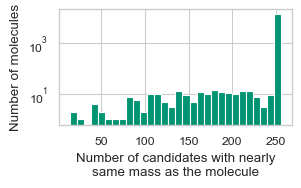

n_cands
256    13797
106        4
188        4
243        4
203        4
       ...  
221        1
164        1
50         1
125        1
143        1
Name: count, Length: 128, dtype: int64

In [8]:
cands_mass['n_cands'] = cands_mass['cands'].apply(len)
utils.init_plotting(figsize=(3, 1.5))
cands_mass['n_cands'].hist(bins=30)
plt.yscale('log')
plt.xlabel('Number of candidates with nearly\nsame mass as the molecule')
plt.ylabel('Number of molecules')
# plt.savefig('n_cands_mass.svg', bbox_inches='tight')
plt.show()
cands_mass['n_cands'].value_counts()

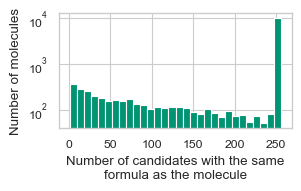

n_cands
256    10063
5         51
4         48
2         46
7         45
       ...  
233        3
214        3
255        3
144        2
232        2
Name: count, Length: 256, dtype: int64

In [9]:
cands_formula['n_cands'] = cands_formula['cands'].apply(len)
utils.init_plotting(figsize=(3, 1.5))
cands_formula['n_cands'].hist(bins=30)
plt.yscale('log')
plt.xlabel('Number of candidates with the same\nformula as the molecule')
plt.ylabel('Number of molecules')
# plt.savefig('n_cands_formula.svg', bbox_inches='tight')
plt.show()
cands_formula['n_cands'].value_counts()

## Number of positive samples among candidates

In [10]:
def n_pos(row):
    inchi_true = utils.smiles_to_inchi_key(row['smiles'])
    return sum(utils.smiles_to_inchi_key(c) == inchi_true for c in row['cands'])

cands_mass['n_pos'] = cands_mass.parallel_apply(n_pos, axis=1)
cands_mass['n_pos'].value_counts()

n_pos
1    14008
Name: count, dtype: int64

In [13]:
cands_mass['n_pos'].value_counts()

n_pos
1    14008
Name: count, dtype: int64

In [11]:
def n_pos(row):
    inchi_true = utils.smiles_to_inchi_key(row['smiles'])
    return sum(utils.smiles_to_inchi_key(c) == inchi_true for c in row['cands'])

cands_formula['n_pos'] = cands_formula.parallel_apply(n_pos, axis=1)
cands_formula['n_pos'].value_counts()

n_pos
1    14008
Name: count, dtype: int64

In [ ]:
cands_formula['n_pos'].value_counts()

## Analyze InChiKeys of queries

In [12]:
len(cands_mass['smiles']), cands_mass['smiles'].apply(utils.smiles_to_inchi_key).nunique()

(14008, 13709)